# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook and details can be found on the EDA Report page on Canvas..</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code or within a code cell.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this proposal is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

The dataset ESGU_5_Y is a collection of daily data for the iShares ESG Aware MSCI USA ETF (ESGU) for the past 5 years (October 15th 2018 - October 13th 2023). ESGU is designed to track the investment results of an index consisting of American companies with positive environmental, social, and governance (ESG) characteristics while exhibiting similar risk and return characteristics as the parent index. 

The dataset contains 7 variables "Date", "Open", "High", "Low", "Close", "Adj Close" and "Volume". "Date" represents the date of the row entry. "Open" represents the first price the stock traded at when the market opened. "High" is the highest price the stock attained in a day. "Low" is the lowest price the stock attained in a day. "Close" represents the last price the stock traded at when the market closed, which is adjusted for stock splits only. "Adj Close" also represents the last price the stock traded at when the market closed but it is adjusted for splits, devidend and capital gain. "Volume" is the number of shares traded in a day. 

ESGU is an iShares fund which is powered by the expert portfolio and risk management of BlackRock. The website of ESGU can be found at https://www.blackrock.com/us/individual/products/286007/ishares-esg-aware-msci-usa-etf. The historical trading data of ESGU particular used for this project can be found at https://finance.yahoo.com/quote/ESGU/history?period1=1539561600&period2=1697328000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true.

<div class="alert alert-block alert-success"><b>Step 2 (4 pts)</b>: Briefly explain why you chose this data. What about the data interests you?  Which specific fields will be the focus of your analysis (list at least 3)?</div>

I studied both Economics and Data Science during my undergraduate study, cultivating strong interests and habits of reading news in the financial market and seizing market trends from available data and information. Analyzing price movements and trading volume of the ETF sector can obtain insights into market trends and investor sentiment in the entire financial market since ETFs are diversified portfolios of a wide range of assets. More importantly, ESG investing has gained significant prominence in recent years as people are increasingly looking for socially responsible investment options for sustainable investing. Based on the two aspects mentioned above, the daily data of ESGU in the past 5 years is an ideal dataset for me to explore the long-term performance of both ETF and ESG investing.

The fields I will focus on in my analysis are:
1. Date
2. Open 
3. Close
4. Volume

Date data is used to limit the time period studied in this project. Open and Close data are used to identify price trends and market cycles over time. Volume data is used to explore the relationship between price movements and trading volume.

<div class="alert alert-block alert-success"><b>Step 3 (2 pts)</b>: Provide a brief overview of your goals as it relates to your analysis plans. </div>

In this project, I plan to look at closing price trends over the past five years to see if investor confidence has grown in socially responsible investing to support businesses that address public concerns about environmental issues, ethical business practices and social impact. I also want to explore the bullish/ bearish market sentiments in esg-related etf investment overtime by tracing the patterns of the differences between opening and close prices. In addition, I want to take both close price data and volume data to see if there is unusually high trading volume during market sentiment reversal.

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.  If you have more than one file, you need to repeat this step for each file. Use a different cell for each file.</div>

In [1]:
# Load up modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
ESGU = pd.read_csv("ESGU_5_Y.csv")

<div class="alert alert-block alert-success"><b>Step 5 (3 pts)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.  Make sure your header is showing accurately as you learned in the Module 4 python homework.  Repeat for as many files as you have and use a new cell for each file.</div>

In [3]:
# TODO: Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
ESGU.info()
# TODO: Use the head() method to inspect the first five (or more) rows of the data
ESGU.head()
# TODO: Use the tail() method to inspect the last five (or more) rows of the data
ESGU.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,10/15/18,60.509998,60.509998,60.160000,60.160000,55.784580,3800
1,10/16/18,60.595001,61.470001,60.595001,61.459999,56.990032,35600
2,10/17/18,61.520000,61.520000,61.099998,61.278000,56.821266,9400
3,10/18/18,61.172001,61.172001,60.360001,60.529999,56.127670,2600
4,10/19/18,60.750000,60.990002,60.299999,60.500000,56.099850,8300


,Date,Open,High,Low,Close,Adj Close,Volume
1253,10/9/23,93.730003,95.000000,93.690002,94.849998,94.849998,371600
1254,10/10/23,95.010002,95.980003,94.989998,95.410004,95.410004,445900
1255,10/11/23,95.769997,95.889999,95.139999,95.839996,95.839996,817400
1256,10/12/23,95.860001,95.989998,94.629997,95.150002,95.150002,668900
1257,10/13/23,95.410004,95.739998,94.320000,94.669998,94.669998,441800


<div class="alert alert-block alert-success"><b>Step 6 - Files uploaded (3 pts)</b>: 

- All data files were uploaded into Canvas
- HTML and .ipynb were uploaded into Canvas 
- HTML and .ipynb have student's last name in file title (example: Smith_EDA_Project)</div>

<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 7 through 11 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

1. I would like to learn the closing price trend of the iShares ESG Aware MSCI USA ETF (ESGU) over the past five years to gauge investor preferences and see if there is continued confidence in this emerging ESG sector to support businesses that address public concerns about environmental issues, ethical business practices, and social impact. I also wanted to look at the performance levels of companies with strong ESG practices in the market by comparing ESGU to the benchmark S&P 500 index. In terms of investment opportunities, I would like to pull out both the closing price data and the volume data to see if there is a correlation between the two variables and if there is an unusually high volume when the market sentiment reverses.

2. Since ESG consideration has been gaining significant momentum in recent years as the increasin concern over environmental issues, such as climate change and sustainability, I have a hunch that the overall price trend of ESGU is positively increasing, indicating that investors are bullish on ESG investing. As a result, companies with strong ESG practices are likely to perform well in the market, resulting in ESGU outperforming the S&P 500 over the past five years. However, even though demand for ESG investments is likely to continue to increase, ESGU's performance will be volatile, with some downgrades in response to gloomy market sentiment and policy changes.

<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
3. Explain anything particular about your data - example: was it a random sample or were sampling weights used with your data?
</div>

1.  The data I have chosen are daily financial data entry for the ESGU over the past 5 years from October 15th 2018 to October 13th 2023.
2. The total sample size before cleaning data is 1258 daily entries.
3. There is no random sampling and nothing particular about this data.

<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. 

- Consider using bullet points so that each variable is on its own line.
- OR consider using an HTML table which is demonstrated in Module 5 code.
- No need to include the variables that you will end up dropping and not use in your analysis.


</div>

### Variables after cleaning the data

| Column | Description | Type |
| --- | --- | --- |
| Date | Date of the row entry | datetime64[ns] |
| ESGU Open | The first price ESGU was traded at when the market opened | float64 |
| ESGU Close | The last price ESGU was traded at when the market closed | float64 |
| ESGU Volume | Number of shares traded in a day | int64 |
| ESGU Daily Return | Investment Return of ESGU over a single trading day | float64 |
| S&P500 Close | The level of S&P 500 index when the market closed | float64 |
| Year | Year of the row entry | object |

<div class="alert alert-block alert-success"><b>Step 10 (12 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?
5. Every field needs to be inspected to ensure it is usable in your analysis.

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

### Edit column names

In [4]:
# Before editing
ESGU.shape

ESGU.rename(columns = {"Open":"ESGU Open","High":"ESGU High","Low":"ESGU Low","Close":"ESGU Close","Adj Close":"ESGU Adj Close","Volume":"ESGU Volume"}, inplace = True)
ESGU.info()

# After editing
ESGU.shape

(1258, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1258 non-null   object 
 1   ESGU Open       1258 non-null   float64
 2   ESGU High       1258 non-null   float64
 3   ESGU Low        1258 non-null   float64
 4   ESGU Close      1258 non-null   float64
 5   ESGU Adj Close  1258 non-null   float64
 6   ESGU Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


(1258, 7)

I added the "ESGU" tag in the column names to indicate that these columns are ESGU data. This can help distinguish the ESGU data from the S&P 500 index data after the daily entry for the S&P 500 index is added to the data frame.

The numbers of row and column have not changed after editing the column names. The number of row is 1258 and the number of column is 7.

### Add a "ESGU Daily Return" column

In [5]:
# Before add
ESGU.shape

ESGU["ESGU Daily Return"] = (ESGU["ESGU Close"].pct_change()).round(4)

# After add
ESGU.shape

ESGU.head()

(1258, 7)

(1258, 8)

,Date,ESGU Open,ESGU High,ESGU Low,ESGU Close,ESGU Adj Close,ESGU Volume,ESGU Daily Return
0,10/15/18,60.509998,60.509998,60.160000,60.160000,55.784580,3800,NaN
1,10/16/18,60.595001,61.470001,60.595001,61.459999,56.990032,35600,0.0216
2,10/17/18,61.520000,61.520000,61.099998,61.278000,56.821266,9400,-0.0030
3,10/18/18,61.172001,61.172001,60.360001,60.529999,56.127670,2600,-0.0122
4,10/19/18,60.750000,60.990002,60.299999,60.500000,56.099850,8300,-0.0005


In this step, I added a new column called "ESGU Daily Return" to trace the daily return of ESGU investment, which will be used to assess the stock's daily price movements and volatility over time in the analysis part.

After adding this column, the number of column in the ESGU dataframe increased to 8. The number of row has not changed.

### Add the S&P 500 index data as a benchmark

In [6]:
SP500 = pd.read_csv("SP500.csv")
SP500.rename(columns = {"Date": "S&P Date","Open":"S&P500 Open","High":"S&P500 High","Low":"S&P500 Low","Close":"S&P500 Close","Adj Close":"S&P500 Adj Close","Volume":"S&P500 Volume"}, inplace = True)

SP500.head(5)

,S&P Date,S&P500 Open,S&P500 High,S&P500 Low,S&P500 Close,S&P500 Adj Close,S&P500 Volume
0,10/15/18,2763.830078,2775.989990,2749.030029,2750.790039,2750.790039,3327160000
1,10/16/18,2767.050049,2813.459961,2766.909912,2809.919922,2809.919922,3460260000
2,10/17/18,2811.669922,2816.939941,2781.810059,2809.209961,2809.209961,3347090000
3,10/18/18,2802.000000,2806.040039,2755.179932,2768.780029,2768.780029,3639300000
4,10/19/18,2775.659912,2797.770020,2760.270020,2767.780029,2767.780029,3593940000


I imported the CSV file for the S&P 500 index data and named the new data frame as "SP500".

In [7]:
# Before adding the columns for S&P 500 index data
ESGU.shape

ESGU["S&P500 Close"] = SP500["S&P500 Close"]

# After adding the columns for S&P 500 index data
ESGU.shape

(1258, 8)

(1258, 9)

In this step, I added in the S&P 500 index data, which will be used in the following analysis to compare ESGU's performance with the benchmark. Since the dates selected for both ESGU and S&P 500 index data when I downloaded the two CSV files were 10/15/2018 to 10/13/2023, the number of daily entries for ESGU and SP500 are the same, and the dates for each entry in the two files could be matched. Therefore, I added the columns "S&P500 Open", "S&P500 Close" and "S&P500 Volume" from the SP500 dataframe directly to the ESGU dataframe.

After adding 1 column for S&P 500 index data, the number of column in the ESGU dataframe became 9. The number of row has not changed.

### Drop columns not needed

In [8]:
col_to_drop = ["ESGU High","ESGU Low","ESGU Adj Close"]

# Before drop
ESGU.shape

ESGU= ESGU.drop(columns = col_to_drop, axis = 1, inplace = False)

# After drop
ESGU.shape

(1258, 9)

(1258, 6)

In [9]:
ESGU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1258 non-null   object 
 1   ESGU Open          1258 non-null   float64
 2   ESGU Close         1258 non-null   float64
 3   ESGU Volume        1258 non-null   int64  
 4   ESGU Daily Return  1257 non-null   float64
 5   S&P500 Close       1258 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In this step, I dropped the columns "ESGU High","ESGU Low","ESGU Adj Close" because I will only use date data and the open price, closing price, and volume data of ESGU and S&P 500 index for price trend exploration and comparison to the benchmark.

After dropping the 3 unneeded columns, the number of column in the dataframe became 6. The number of row has not changed.

### Format the column "Date" & Create a new column "Year"

In [10]:
# Before adjusting date information
ESGU.shape

# Convert "Date" column to datetime
ESGU["Date"] = pd.to_datetime(ESGU["Date"], format='%m/%d/%y')

(1258, 6)

In [11]:
# Extract and format the year information
ESGU["Year"] = ESGU["Date"].dt.strftime('%Y')

# After the adjustment
ESGU.shape

(1258, 7)

In this step, I first changed the variable "Date" from the object data type to the datatime data type to uniform the date of each entry in the format of "year-month-day". Then, I extracted the year information from the variable "Date" and stored them into a new variable called "Year". The year information will be used later to group entries by year for further analsis.

After adjusting the format of the "Date" column and adding a "Year" column, the number of column in the dataframe increased to 7. The number of row has not changed.

### Describe

In [12]:
ESGU.describe()

,ESGU Open,ESGU Close,ESGU Volume,ESGU Daily Return,S&P500 Close
count,1258.000000,1258.000000,1.258000e+03,1257.000000,1258.000000
mean,82.289804,82.289533,8.891959e+05,0.000457,3678.910294
std,15.029838,15.050844,2.049684e+06,0.013876,649.535269
min,51.639999,49.980000,1.100000e+03,-0.120000,2237.399902
25%,66.679998,66.565000,2.605250e+05,-0.005400,3013.327454
50%,85.759998,85.740002,6.562500e+05,0.000800,3827.210083
75%,95.217502,95.295002,9.764500e+05,0.007300,4228.174926
max,108.779999,108.459999,5.069700e+07,0.096900,4796.560059


From the describe(), I observed one possible inconsistency in the column "ESG Volume". The maximum value 5.069700e+07 is much higher than the 75% value 9.764500e+05. Thus, I will further investigate this issue with a boxplot and a closer inspection on the tail end of ESGU Volume.

### Boxplot

<AxesSubplot:>

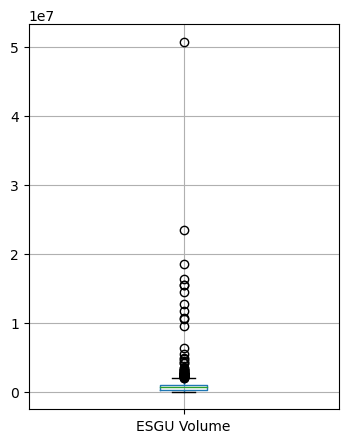

In [13]:
ESGU.boxplot(column = "ESGU Volume", figsize = (4,5))
plt.show()

From the boxplot of ESGU Volume, I could spot a large amount of outliers on the right tail. Since the trade volume will be affected by market dynamics, it is acceptable to have a relatively large variation in the ESGU trade volume data. However, the dot beyond 5e7 is heavily deviated from the main cluster, so this could be an inaccurate or unusual data that I should not include in overall trend analysis.

In [14]:
ESGU["ESGU Volume"].describe(percentiles = [0.25, 0.5, 0.75, 0.95])

count    1.258000e+03
mean     8.891959e+05
std      2.049684e+06
min      1.100000e+03
25%      2.605250e+05
50%      6.562500e+05
75%      9.764500e+05
95%      2.192565e+06
max      5.069700e+07
Name: ESGU Volume, dtype: float64

By looking closer at the tail end of ESGU Volume, I can see that there is still a big jump beyond the 95 percentile. 

Although it is reasonable to have an extremely large trade volume due to specific new event or policy releases, I will eliminate entries with a ESGU volume value greater than Q3 + 3 * IQR because removing those extreme outliers could help avoid skewing the analysis results which explore the relationship between price and trade volume.

In [15]:
ESGU_Volume_Q1 = ESGU["ESGU Volume"].quantile(0.25)
ESGU_Volume_Q3 = ESGU["ESGU Volume"].quantile(0.75)

ESGU_Volume_IQR = ESGU_Volume_Q3 - ESGU_Volume_Q1

upper_bound = ESGU_Volume_Q3 + 3 * ESGU_Volume_IQR

# Before drop
ESGU.shape

ESGU = ESGU[(ESGU["ESGU Volume"] <= upper_bound)]

# After drop
ESGU.shape

(1258, 7)

(1234, 7)

<AxesSubplot:>

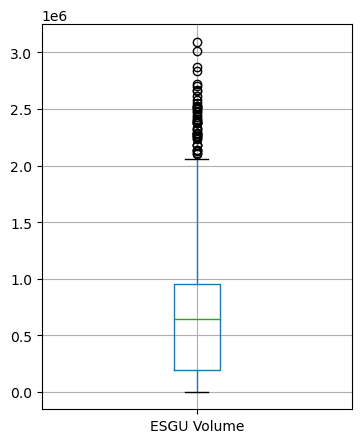

In [16]:
# Check after elimination
ESGU.boxplot(column = "ESGU Volume", figsize = (4,5))
plt.show()

The boxplot without the extreme outliers on the right end of ESGU Volume is better than the original one. The remaining outliers represented by the black circles might be volumes that are relatively high but within a reasonable range of volatility. These can be kept to study if there is an unusually high trade volume when the market sentiment reverses. In this step, I eliminated 24 rows. After the cleaning, the number of row in the dataframe became 1234. The number of column has not changed.

### Final review of phase 1

In [17]:
# Display information of the dataframe after cleaning
ESGU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1234 non-null   datetime64[ns]
 1   ESGU Open          1234 non-null   float64       
 2   ESGU Close         1234 non-null   float64       
 3   ESGU Volume        1234 non-null   int64         
 4   ESGU Daily Return  1233 non-null   float64       
 5   S&P500 Close       1234 non-null   float64       
 6   Year               1234 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 77.1+ KB


In [18]:
# Display the first 5 rows of the dataframe after cleaning
ESGU.head(5)

,Date,ESGU Open,ESGU Close,ESGU Volume,ESGU Daily Return,S&P500 Close,Year
0,2018-10-15,60.509998,60.160000,3800,NaN,2750.790039,2018
1,2018-10-16,60.595001,61.459999,35600,0.0216,2809.919922,2018
2,2018-10-17,61.520000,61.278000,9400,-0.0030,2809.209961,2018
3,2018-10-18,61.172001,60.529999,2600,-0.0122,2768.780029,2018
4,2018-10-19,60.750000,60.500000,8300,-0.0005,2767.780029,2018


<div class="alert alert-block alert-success"><b>Step 11 (1 pt)</b>: <br>
    
Upload your cleaned data file, Jupyter Notebook and HTML to Canvas.
</div>

In [19]:
ESGU.to_csv("ESGU_w_benchmark.csv", index = False)

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. </div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

I will start the EDA Phase 2 by loading all the packages needed and the dataset I generated from Phase 1 to review the structures and contents of my dataset.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
df = pd.read_csv("ESGU_w_benchmark.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1234 non-null   object 
 1   ESGU Open          1234 non-null   float64
 2   ESGU Close         1234 non-null   float64
 3   ESGU Volume        1234 non-null   int64  
 4   ESGU Daily Return  1233 non-null   float64
 5   S&P500 Close       1234 non-null   float64
 6   Year               1234 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 67.6+ KB


,Date,ESGU Open,ESGU Close,ESGU Volume,ESGU Daily Return,S&P500 Close,Year
0,2018-10-15,60.509998,60.160000,3800,NaN,2750.790039,2018
1,2018-10-16,60.595001,61.459999,35600,0.0216,2809.919922,2018
2,2018-10-17,61.520000,61.278000,9400,-0.0030,2809.209961,2018
3,2018-10-18,61.172001,60.529999,2600,-0.0122,2768.780029,2018
4,2018-10-19,60.750000,60.500000,8300,-0.0005,2767.780029,2018


### Correlations

,ESGU Open,ESGU Close,ESGU Volume,S&P500 Close
ESGU Open,1.000000,0.998624,0.542711,0.994521
ESGU Close,0.998624,1.000000,0.542065,0.996011
ESGU Volume,0.542711,0.542065,1.000000,0.535076
S&P500 Close,0.994521,0.996011,0.535076,1.000000


<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap ESGU data')

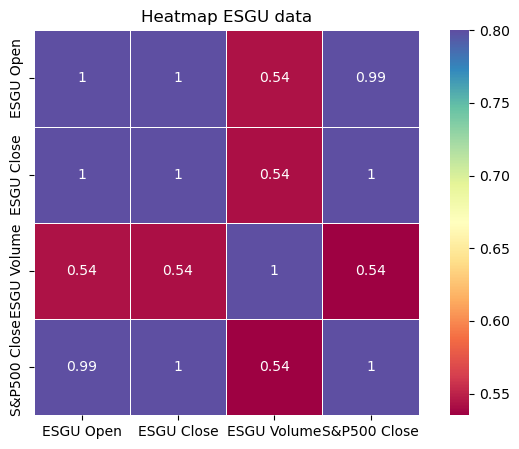

In [22]:
columns = ["ESGU Open","ESGU Close", "ESGU Volume", "S&P500 Close"]
df_corr = df[columns]
df_corr.corr()

corrmat = df_corr.corr()
f, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(corrmat, vmax = 0.8, square = True, annot = True, cmap = "Spectral", linewidths = 0.5)
plt.title("Heatmap ESGU data")
plt.show()

In looking at the heatmap above, there is a strong positive correlation (0.9960) between ESGU Close and S&P 500 Close. I will use the two variables to conduct trend analysis and benchmark comparison in the following analysis to investigate investor confidence in socially responsible investing and performance levels of companies with strong ESG practices in the market.

There is also a strong positive correlation (0.998625) between ESGU Open and ESGU Close. I will use these two variables to evaluate the price stability with intraday price movements.

There is a relatively strong relationship (0.5432) between ESGU Close and ESGU Volume. I will use the two varibles to see if swings in trading volume can be an indication of changes in the price trend.

### ESGU Trend Analysis

<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='ESGU Close'>

Text(0.5, 1.0, "ESGU's Closing Stock Price Over Time")

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Closing Price')

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

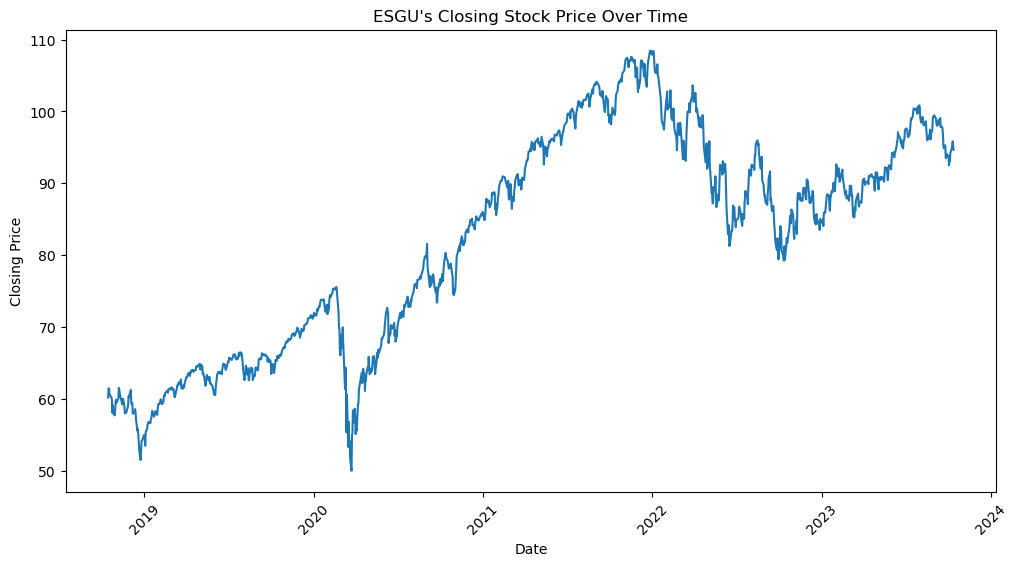

In [23]:
df["Date"] = pd.to_datetime(df["Date"])


plt.figure(figsize = (12, 6))
sns.lineplot(x = "Date", y = "ESGU Close", data = df)
plt.title("ESGU's Closing Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Use YearLocator and DateFormatter to format the x-axis
years = mdates.YearLocator()
date_format = mdates.DateFormatter("%Y")

# Apply the formatting to the x-axis
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation = 45)

plt.show()

From the line plot of ESGU closing price from 10/15/2018 to 10/13/2023, we can see the closing stock prices follow an overall increasing trend over time with several relatively intense fluctuations.The 3 sharp declines happened in 12/2018 and 02/2020. There is also a continuous decrease during 01/2022 and 10/2022 with fluctuations.

I will then create boxplots to inspect the ESGU closing prices in more detail by years.

<AxesSubplot:xlabel='Year', ylabel='ESGU Close'>

Text(0.5, 1.0, "ESGU's Closing Stock Prices by Year")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Closing Stock Price')

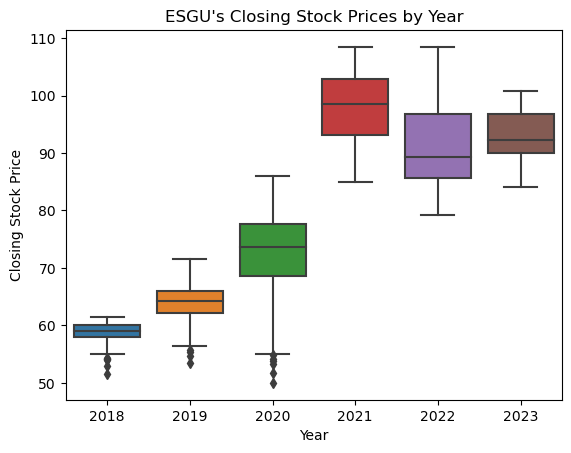

In [24]:
sns.boxplot(x = "Year", y = "ESGU Close", data = df)
plt.title("ESGU's Closing Stock Prices by Year")
plt.xlabel("Year")
plt.ylabel("Closing Stock Price")
plt.show()

From the boxplots, we can see the closing prices have generally increased from 2018 to 2020 with some outliers and experienced a surge from 2020 to 2021. The closing prices remained at relatively the same level from 2021 to 2023 with a slight drop in 2022 and a recovery in 2023.

Through these observations, we can infer that investors have increasing confidence in ESG practices from the increasing trend in general. However, we should expect price drops when encountering ESG-related regulatory changes or a general market downturn. 

In the next step, I will compare the ESGU closing price trend with the trend of S&P 500 index to see whether the price drops are due to systematic investing risks accross the whole market or unsystematic risks specific to the ESG field.

### Comparison with the benchmark

<AxesSubplot:xlabel='Date', ylabel='ESGU Close'>

<AxesSubplot:xlabel='Date', ylabel='S&P500 Close'>

Text(0.5, 1.0, "ESGU's Closing Stock Price Over Time")

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Close Price')

Text(0.5, 1.0, 'S&P500 Closing Index Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Close')

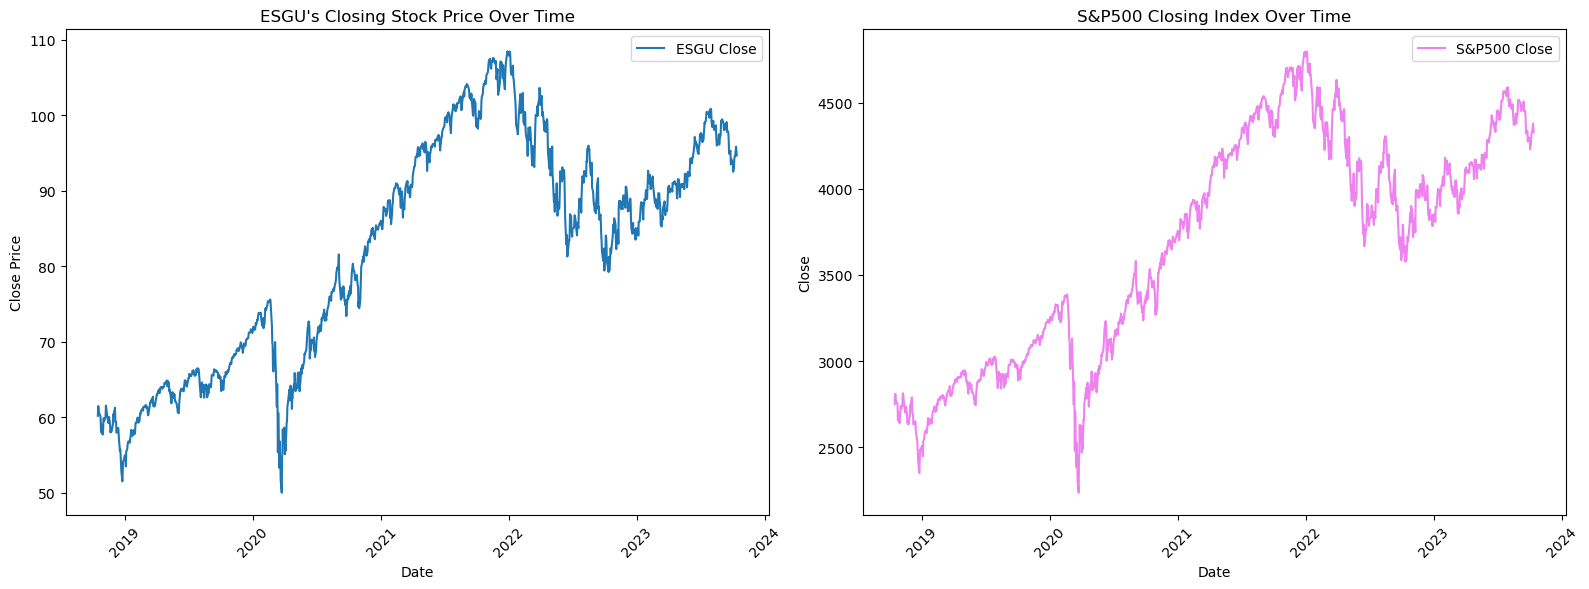

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))


sns.lineplot(x = "Date", y = "ESGU Close", data = df, label = "ESGU Close", ax = axes[0])
sns.lineplot(x = "Date", y = "S&P500 Close", data = df, label = "S&P500 Close", ax = axes[1], color = "violet")


axes[0].set_title("ESGU's Closing Stock Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Close Price")

axes[1].set_title("S&P500 Closing Index Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Close")

date_format = mdates.DateFormatter("%Y")

for ax in axes:
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(date_format)
    ax.tick_params(axis = "x", rotation = 45)

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

Since S&P 500 Close is a float-weighted index, which is measured differently than closing stock prices, so I showed the two trends separately in parallel graphs rather than plotting them together in the same graph with a common y scale. By comparing the two line plots, we can see that the ESGU closing price trend is similar and largely in line with that of the S&P 500 index, which indicates that the price drops might be related to the bad market conditions but not the poor performance of companies with ESG practices. In addition, we may infer that ESGU, as an emerging investment option, has achieved similar results compared to the benchmark, implying a reasonably positive assessment of the ESGU performance which could be a favorable sign for investors.

In the next step, I will transfer from long-term analysis to short-term investigation on the performance of ESGU by looking at the intra price difference and daily returns of ESGU.

### ESGU Intra Price Stability

From the heatmap at the beginning of EDA Phase 2, we can see that the open price of ESGU is highly correlated to its closing price over time, which means that there is a strong relationship between ESGU open and closing price.

I will further explore the relationship between ESGU open and closing price with a line plot which displays the trend of both prices over time. I will also create a plot of ESGU daily price difference to evaluate the price stability on a daily basis.

<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='ESGU Open'>

<AxesSubplot:xlabel='Date', ylabel='ESGU Open'>

Text(0.5, 1.0, "ESGU's Open vs. Closing Stock Prices Over Time")

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

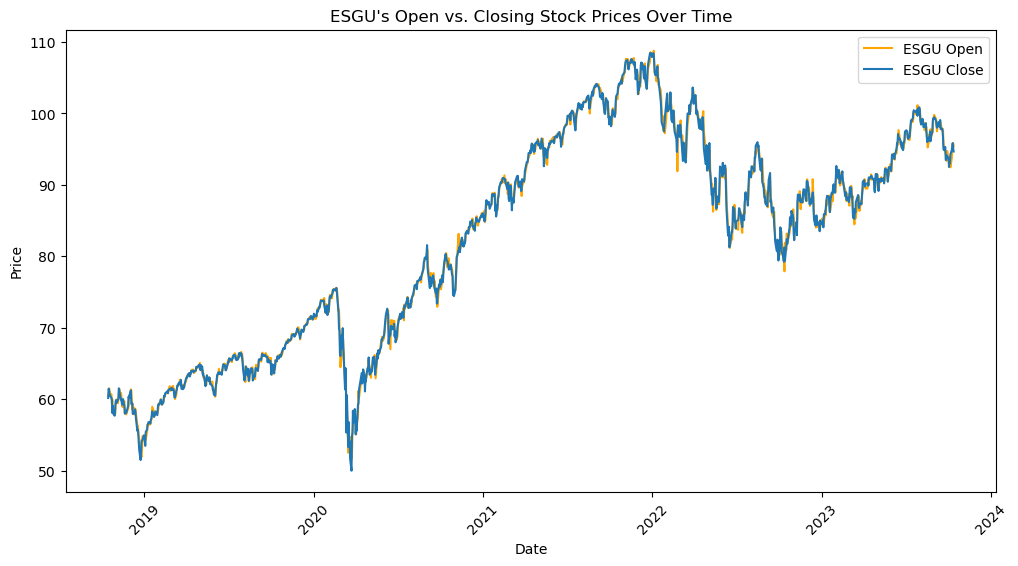

In [26]:
df['Date'] = pd.to_datetime(df['Date'])


plt.figure(figsize=(12, 6))

sns.lineplot(x = "Date", y = "ESGU Open", data = df, label = "ESGU Open", color = "orange")
sns.lineplot(x = "Date", y = "ESGU Close", data = df, label = "ESGU Close")


plt.title("ESGU's Open vs. Closing Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")


years = mdates.YearLocator()
date_format = mdates.DateFormatter("%Y") 
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation = 45)

plt.legend()

plt.show()

From the plot above, we can see that the trend lines of ESGU open price and closing price roughly overlap, which confirms with the high correlation between ESGU Open and ESGU Close.

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Daily Price Difference')

Text(0.5, 1.0, "ESGU's Daily Price Difference")

(-6.0, 6.0)

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

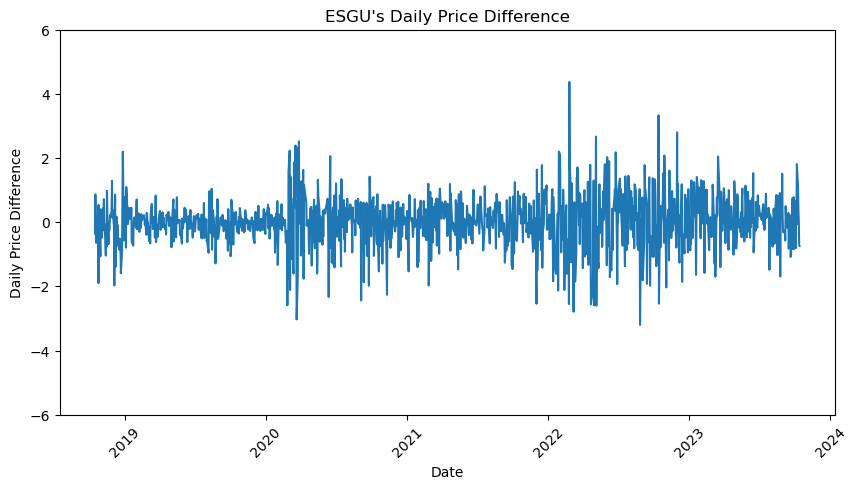

In [27]:
difference = df['ESGU Close'] - df["ESGU Open"]

plt.figure(figsize = (10, 5))
plt.plot(df["Date"], difference)

plt.xlabel("Date")
plt.ylabel("Daily Price Difference")
plt.title("ESGU's Daily Price Difference")
plt.ylim(-6, 6)

plt.xticks(rotation = 45)

plt.show()

By looking closer at the daily price difference, we can see that most daily price difference are within the range of -2 to 1 with some fluctuations as high as the absolute value of 4. The daily price differences from 10/2018 to 08/2021 are relatively stable while there are more fluctuations after 08/2021. Therefore, we may conclude that the daily price differences are relatively stable in a constant range over time but with certain interday price fluctuations.

### ESGU Daily Returns

After analyzing interday price differences, I am going to look at daily returns of investing in ESGU to further evaluate the ESGU's performance over short time periods. 

Daily return is calculated as the percentage change in ESGU closing price from the previous day.

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, "ESGU's Daily Return")

Text(0.5, 1.0, "ESGU's Daily Return Over Time")

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

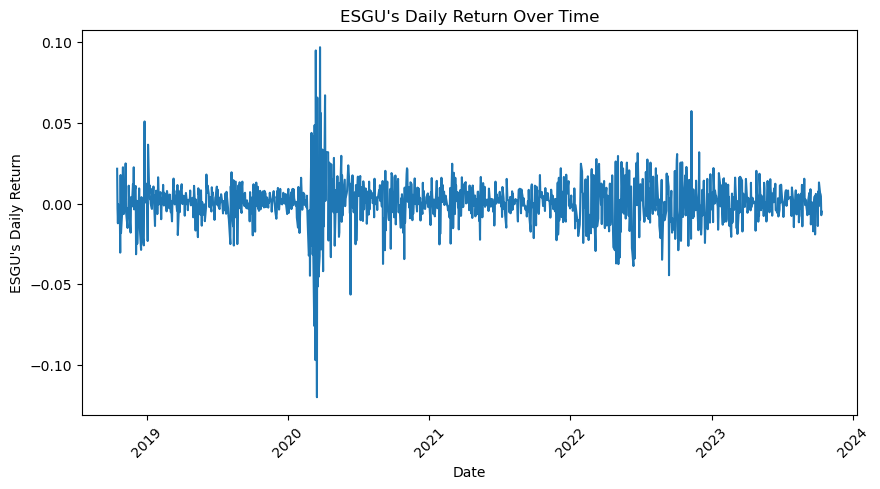

In [28]:
plt.figure(figsize = (10, 5))
plt.plot(df["Date"], df["ESGU Daily Return"], linestyle = "-")

plt.xlabel("Date")
plt.ylabel("ESGU's Daily Return")
plt.title("ESGU's Daily Return Over Time")

plt.xticks(rotation = 45)

plt.show()

By looking at the daily returns, we can see that most values are in the range of -0.025 to 0.025. The daily returns during 02/2020 and 03/2020 are outstanding, which reach as high as the absolute value of 0.1. Similar to intra price differences, the fluctuation rage of daily returns from 10/2018 to 10/2020 are relatively stable, while the fluctuation range increased to the range of -0.05 to 0.04 after 10/2020, and decreased back to the range of -0.02 to 0.02 after 01/2023. Thus, we may conclude that ESGU's daily returns have experienced relatively constant fluctuations with a few exceptions.

The mean of ESGU's daily returns over the 5 years is 0.0005
The median of ESGU's daily returns over the 5 years is 0.0008


<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='ESGU Daily Return', ylabel='Count'>

Text(0.5, 1.0, "ESGU's Daily Returns")

Text(0.5, 0, 'Daily Return')

Text(0, 0.5, 'Frequency')

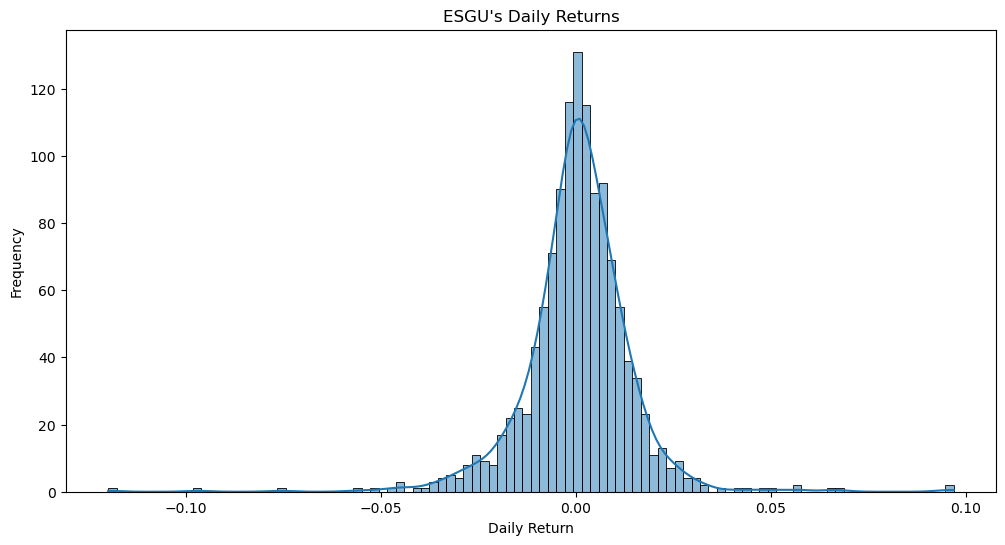

In [29]:
mean_daily_return = "{:.4f}".format(np.mean(df["ESGU Daily Return"].dropna()))
median_daily_return = "{:.4f}".format(np.median(df["ESGU Daily Return"].dropna()))
print("The mean of ESGU's daily returns over the 5 years is", mean_daily_return)
print("The median of ESGU's daily returns over the 5 years is", median_daily_return)

plt.figure(figsize = (12,6))
sns.histplot(df["ESGU Daily Return"], bins = 100, kde = True)
plt.title("ESGU's Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

By looking at the histogram of ESGU's daily returns, we can also see long tails on the two sides, which may include outliers during 02/2020 and 03/2020. Daily return values are mostly between -0.05 and 0.05 with both the mean and median being greater than 0. It indicates positive performance of ESGU and suggests that the stock, on average, has experienced positive returns on most trading days during the 5 years. 

From the analysis of interday price difference and daily returns of ESGU, we may conclude that even though ESGU has a positive performance, it might not be a suitable option for investors who are focusing on short-term investment, especially trading on daily basis, since the certain fluctuations in both interday prices and daily returns may lead to investment losses.

### ESGU's Closing Price and Volume Traded

From the heatmap at the beginning of EDA Phase 2, we can spot a relatively strong correlation between ESGU closing price and its trading volume over time. Thus, I will pull out ESGU Close and ESGU Volume to investigate the relationship between the two variables.

,Year,Mean ESGU Close,Mean ESGU Volume
0,2018,58.452887,2.609623e+04
1,2019,64.097036,5.842619e+04
2,2020,72.772413,6.391923e+05
3,2021,97.821245,9.617835e+05
4,2022,91.207901,1.210697e+06
5,2023,93.054106,7.923442e+05


<Figure size 800x300 with 0 Axes>

Text(0.5, 1.0, "Mean ESGU's Closing Price by Year")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mean Closing Price')

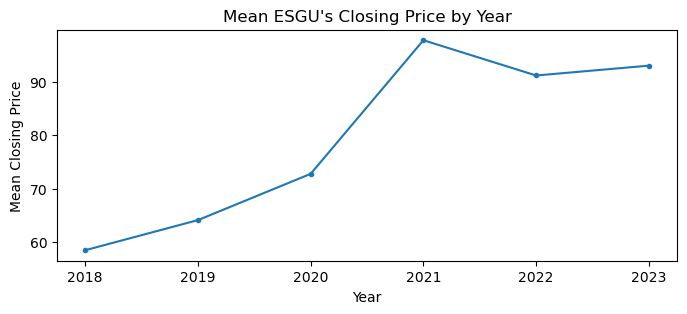

<Figure size 800x300 with 0 Axes>

Text(0.5, 1.0, "Mean ESGU's Volume by Year")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mean Volume')

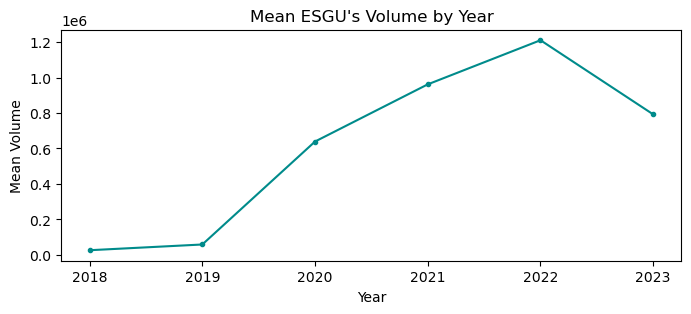

In [30]:
mean_close = df["ESGU Close"].groupby(df["Year"]).agg("mean")
mean_close_table = pd.DataFrame(mean_close).reset_index()
mean_close_table.columns = ["Year", "Mean ESGU Close"]

mean_volume = df["ESGU Volume"].groupby(df["Year"]).agg("mean")
mean_volume_table = pd.DataFrame(mean_volume).reset_index()
mean_volume_table.columns = ["Year", "Mean ESGU Volume"]

mean_table = pd.merge(mean_close_table, mean_volume_table, on = "Year")
mean_table

plt.figure(figsize = (8, 3))
plt.plot(mean_close, marker = ".")
plt.title("Mean ESGU's Closing Price by Year")
plt.xlabel("Year")
plt.ylabel("Mean Closing Price")
plt.show()

plt.figure(figsize = (8, 3))
plt.plot(mean_volume, marker = ".", color = "darkcyan")
plt.title("Mean ESGU's Volume by Year")
plt.xlabel("Year")
plt.ylabel("Mean Volume")
plt.show()

I first calculate the mean closing price and the mean trading volume in each year to outline the respective movements in stock price and trading volume. I also use line plots to visualize the movements. We can see that ESGU's closing price and its trading volume both follow a similar increasing trend from 2018 to 2021 on their mean values. However, the mean closing price decreased in 2022 and slightly increased in 2023 while the mean trading volume had opposite movements from 2021 to 2023. Therefore, ESGU's closing price might not be positively correlated with its trading volume. I will then use the complete data of ESGU Close and ESGU Volume to look at their relationship in more detail.

In [31]:
import warnings
# Filter out the specific warning
warnings.filterwarnings("ignore", message="color is redundantly defined by the 'color' keyword argument")

df["Price Difference"] = df["ESGU Close"].diff()
q1 = df["Price Difference"].quantile(0.25)
q3 = df["Price Difference"].quantile(0.75)

# Calculate the IQR (Interquartile Range)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("The lower threshold is", lower_bound.round(2))
print("The upper threshold is", upper_bound.round(2))

The lower threshold is -1.93
The upper threshold is 2.07


<AxesSubplot:xlabel='Date', ylabel='ESGU Close'>

Text(0.5, 1.0, "ESGU's Closing Prices")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Closing Price')

<AxesSubplot:xlabel='Date', ylabel='ESGU Volume'>

Text(0.5, 1.0, "ESGU's Volume Traded")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Volume')

Text(0.5, 0.98, "ESGU's Closing Prices vs. Volume Traded")

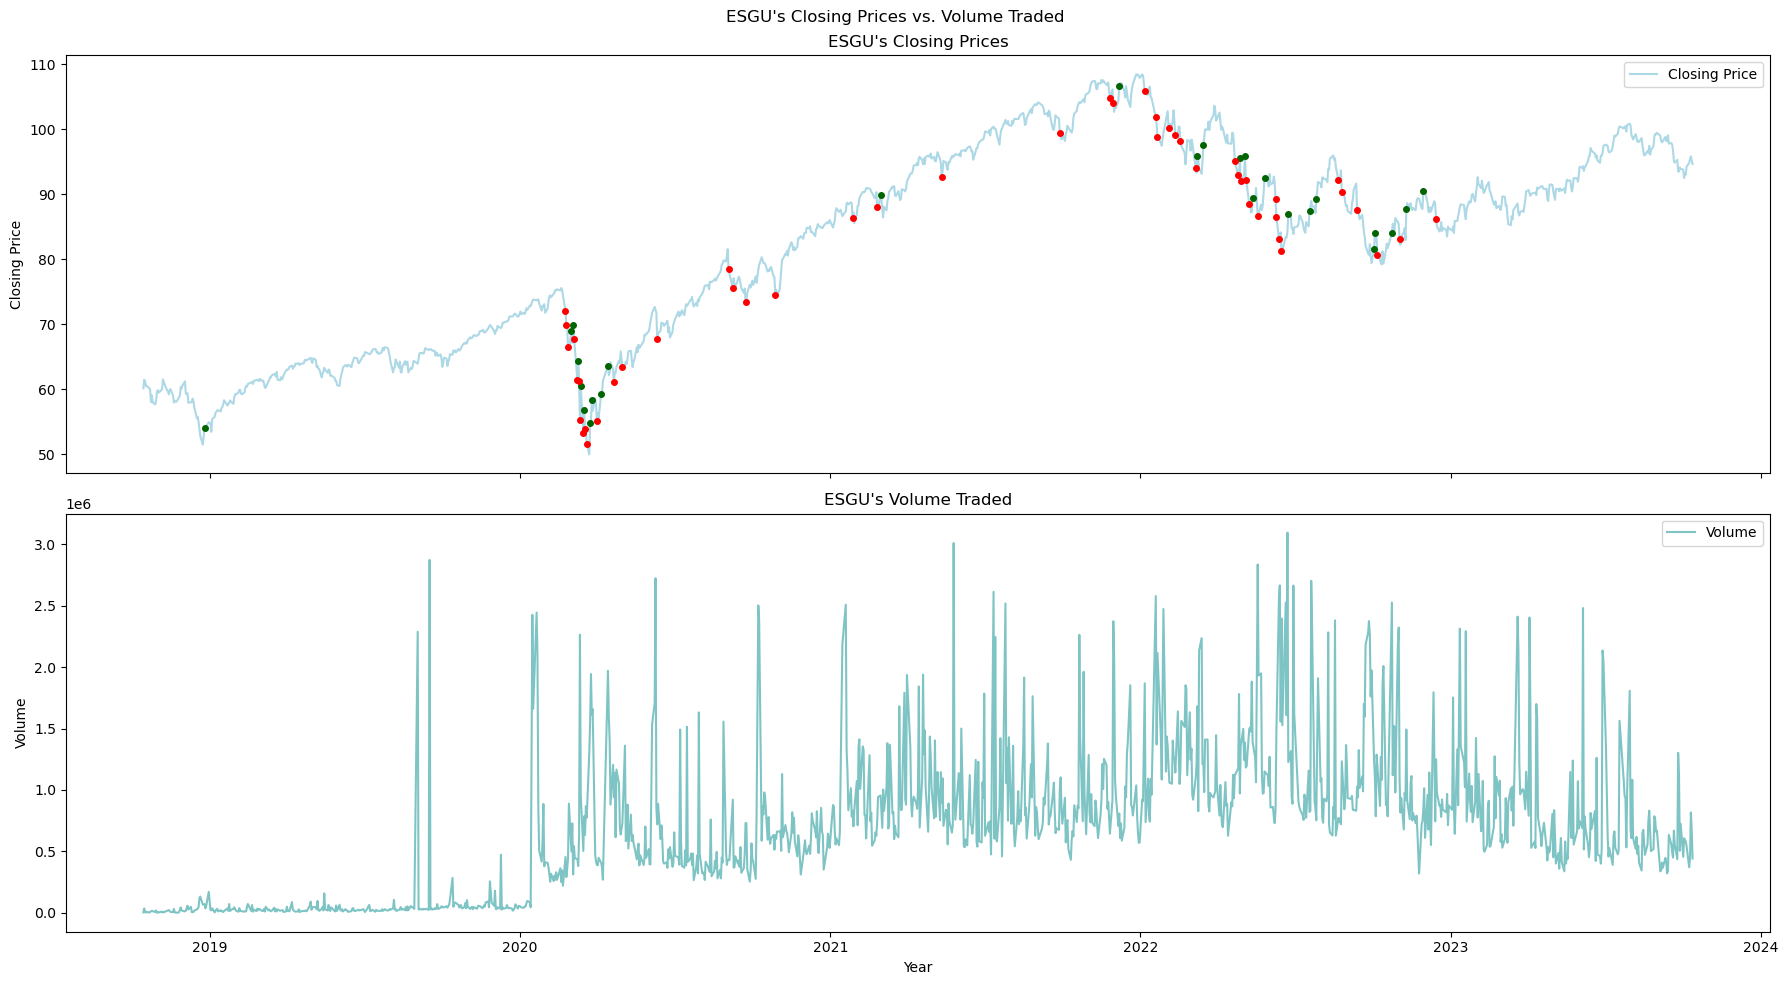

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (18, 10), sharex = True)

sns.lineplot(x = "Date", y = "ESGU Close", data = df, color = "lightblue", ax = ax1)
ax1.set_title("ESGU's Closing Prices")
ax1.set_xlabel("Year")
ax1.set_ylabel("Closing Price")
ax1.legend(["Closing Price"])

df_above_threshold = df[df["Price Difference"] > upper_bound]
ax1.plot(df_above_threshold["Date"], df_above_threshold["ESGU Close"], "ro", markersize = 4, label = "Price Pull-back", color = "darkgreen")
df_below_threshold = df[df["Price Difference"] < lower_bound]
ax1.plot(df_below_threshold["Date"], df_below_threshold["ESGU Close"], "ro", markersize = 4, label = "Price Drop", color = "r")

sns.lineplot(x = "Date", y = "ESGU Volume", data = df, color = "darkcyan", alpha = 0.5, ax = ax2)
ax2.set_title("ESGU's Volume Traded")
ax2.set_xlabel("Year")
ax2.set_ylabel("Volume")
ax2.legend(["Volume"])

fig.suptitle("ESGU's Closing Prices vs. Volume Traded")

plt.tight_layout()

plt.show()

From the plots above, we can see that the volume traded was relatively stable from 10/2018 to 01/2020 with two sudden surges in 08/2019. The trading volume then continued to fluctuate after 01/2020. 
 
I intend to explore whether there is an unusually high volume when the market sentiment reverses. To search for days with sharp closing price drops or pull-backs, I first create a new column in the dataframe called "Price Difference" for change in ESGU's closing price from the previous day, and then use 1.5 * IQR of the variable "Price Difference" to calculate the lower and upper thresholds in order to determine days with sharp price drops and pull-backs. Red dots represent days with a sharp price drop beyond the lower bound and green dots represent days with a sharp pull-back beyond the upper bound. By looking at both plots, we can see that most of the days represented by the red or green dots have a surge in trading volume. Therefore, we can infer that volume traded would be unusually high during market sentiment reverses. However, we cannot take the high volume as a signal of a change in market sentiment, as there are still plenty of volume surges that occur on days when the closing price does not change significantly.

### Summary

· The upward trend of ESGU's closing price and similar results compared to the benchmark indicate that ESGU has been performing positively over the past 5 years. Investors are optimistic about the companies implementing ESG and believe that ESG investment prospects are promising. Therefore, ESGU could be a good long-term investment choice.

· ESGU is not a suitable option for investors seeking fast profits, as its internal spreads and daily returns fluctuate constantly over time, which may lead to a number of short-term investment losses.

· There is an unusually high ESGU's trading volume when the market sentiment reverses. However, unusually high trading volumes cannot signal a change in market sentiment.

In [33]:
# Write out the final file
df.to_csv("ESGU_final.csv", header = True, index = False)